$\textbf{Introduction}$

We now read in the spreadsheet as a table, Tab.  It reads in all of the variables.

In [118]:
opts = detectImportOptions('China_ExRates.xlsx');

Tab = readtable('China_ExRates.xlsx','ReadVariableNames',true); 


We now look at the size of the Tab. 


In [119]:
Tab.Properties.VariableNames


ans =

  1x28 cell array

  Columns 1 through 11

    {'Date'}    {'USDCHF'}    {'USDAUD'}    {'RMBICHF'}    {'RMBIAUD'}    {'RMBI_SGD'}    {'RMBITHB'}    {'RMBIMYR'}    {'RMBIRUB'}    {'RMBICAD'}    {'YENCHF'}

  Columns 12 through 22

    {'YENAUD'}    {'GBPCHF'}    {'GBPAUD'}    {'EURCHF'}    {'EURAUD'}    {'KRWCHF'}    {'KRWAUD'}    {'THBCHF'}    {'MYRCHF'}    {'SGDCHF'}    {'CADCHF'}

  Columns 23 through 28

    {'RUBCHF'}    {'THBAUD'}    {'MYRAUD'}    {'SGDAUD'}    {'CADAUD'}    {'RUBAUD'}




We now create the date vector as well as the USDCHF and the CNYCHF exchange rate variables, as well as the other exchange rates against the CHF.

In [98]:
date1 = Tab(2:end,1);  USDCHF = Tab(2:end,2); CNYCHF = Tab(2:end,4); YENCHF = Tab(2:end,11); KORCHF = Tab(2:end,17);
EURCHF= Tab(2:end,15); GBPCHF = Tab(2:end,13); SINCHF = Tab(2:end,21); MYRCHF = Tab(2:end,22); THBCHF= Tab(2:end,19);
Junk = Tab.Properties.VariableNames;
Junk(1:end);
Names = Junk([2 11 17 15 13 21 22 19]);
Names1 = Names'



Names1 =

  8x1 cell array

    {'USDCHF'}
    {'YENCHF'}
    {'KRWCHF'}
    {'EURCHF'}
    {'GBPCHF'}
    {'SGDCHF'}
    {'CADCHF'}
    {'THBCHF'}




We need to transform the variables we imported as Table variables in array variables.  We creat the Y dependent variable as well as the matrix of regressors.

In [99]:
date2 = table2array(date1); date3=datetime(date2); 
Y = table2array(CNYCHF);
X1 = [USDCHF YENCHF KORCHF EURCHF GBPCHF SINCHF MYRCHF THBCHF];
X = table2array(X1);
X = fillmissing(X,'previous');


We can now plot the two exchange rates as subplots

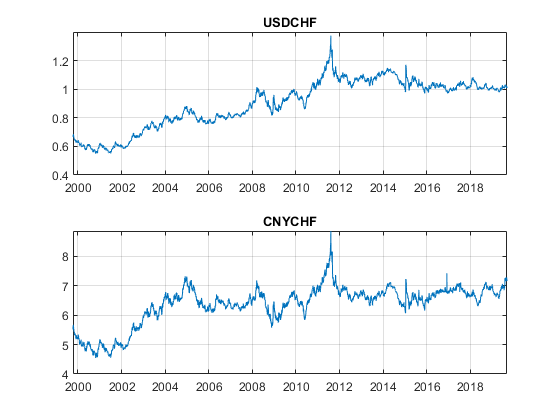

In [100]:
subplot(211); plot(date3, X(:,1)); grid; title('USDCHF'); subplot(212); plot(date3, Y); grid; ...
title('CNYCHF');


We can see that there is a strong correlation between the two exchange rates against the Swiss Franc. Of course, when we look at the exchange rate series, we also want to look at the percentage cahnges of each rate against the Swiss Franc.  It makes it much easier for comparison. For this reason we take log first differences of the two variables.  Since we lose one observation, we have to start the date variable with one less observation.  We can use lower case letters for the log first differences of the exchange rate data.

In [101]:
usdchf = diff(log(X(:,1)));  cnychf = diff(log(Y)); date4 = date3(2:end,:);

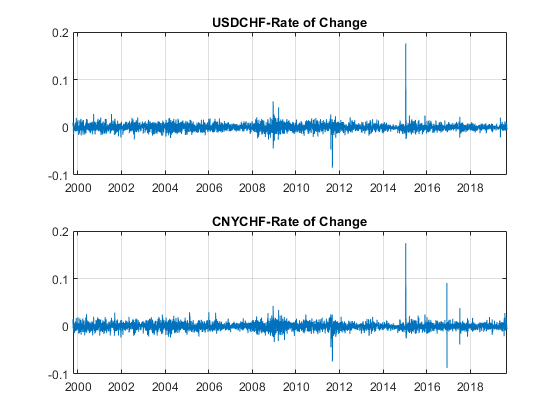

In [102]:
subplot(211); plot(date4, usdchf); grid; title('USDCHF-Rate of Change'); subplot(212); ...
plot(date4, cnychf); grid; ...
title('CNYCHF-Rate of Change');


We see with the log first-differenced data that the correlations become more apparent. When the dollar is voatile against the Swiss Fran, so is the RMB.

$\underline{Properties}$

Now lets look at the distribtuion of the two first-differenced series.  We compare the distribution with that of the benchmark normal distribution. We shift from the time domain of the data to the frequency domail.  The $\textbf{histogram}$ orders the data series from the smallest to highest values and then it divided the data in a given number of intervals and counts the number of data points in each interval.

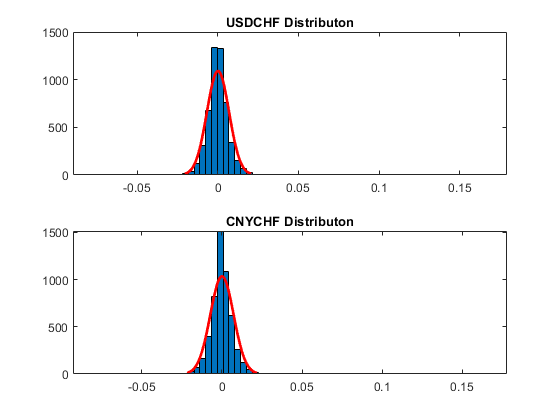

In [103]:
subplot(211); histfit(usdchf); title('USDCHF Distributon');...
subplot(212); histfit(cnychf); title('CNYCHF Distributon');

We see that both distributions display what is called excess kurtosis.  This means that the distributions are bunched excessively around the means as well as the far tails of the distribtuion.


Are either of these disbributions normal?  We can test this with the Jarque-Bera test.
A standard normal distribuiton has mean zero, variance one, skewness at zero and kurtosis at 3.
The JB test examines the disbrituions in question to see if the skewness and kertosis measures are significantly different form that of the normal distributons. 

In [104]:
[h1, p1] = jbtest(usdchf); [h2, p2]= jbtest(cnychf)


h2 =

     1


p2 =

   1.0000e-03




$\textbf{Regression}$

We now do regression analysis.  First we take the log fist differences of the X and Y variables and add in a constant term.

In [105]:
Ydiff = diff(log(Y));
Xdiff1 = diff(log(X));
Xdiff = [Xdiff1(:,1:5) ones(length(Xdiff1),1)];



In [115]:
beta = (Xdiff'*Xdiff)\Xdiff'*Ydiff;

error = Ydiff - Xdiff * beta;
dgf = length(Xdiff)-length(beta);
stderror = (error'*error)/dgf;

sig_beta = stderror * inv(Xdiff'*Xdiff);
sig_beta1 = diag(sig_beta).^.5;
tstat_beta = beta./sig_beta1;
pvalue = 1-tcdf(tstat_beta, dgf);
Stats = [beta sig_beta1 tstat_beta pvalue];
TabStats = array2table(Stats);
Names2 = [Names1(1:5); 'constant'];


TabStats1 = [Names2 TabStats];
TabStats1.Properties.VariableNames = ["Regressor","Coeff","StdDev","Tstat","Pval"];
TabStats1



TabStats1 =

  6x5 table

     Regressor         Coeff         StdDev       Tstat         Pval   
    ____________    ___________    __________    ________    __________

    {'USDCHF'  }        0.66118      0.013834      47.792             0
    {'YENCHF'  }       0.035615      0.010822      3.2908    0.00050284
    {'KRWCHF'  }       0.033144      0.008703      3.8083     7.077e-05
    {'EURCHF'  }       0.095956      0.020077      4.7794     9.032e-07
    {'GBPCHF'  }       0.029573      0.015682      1.8858      0.029689
    {'constant'}    -1.8194e-05    7.2176e-05    -0.25208       0.59951




We see that the USD has the dominating effect on the CYN, followed by the Euro, which as a coefficient of .9.  It might be surprising that the Yen and Won are not stronger.  But for the Chinese currency managers, perhaps the US and Euro are more important target currencies.

$\textbf{Singapore Effect: A Statistical Illusion?}$

Now lets add in the three other Asian currencies, the Sing Dollar, Malaysian Ringgit and Thai baht.

In [116]:
Ydiff = diff(log(Y));
Xdiff1 = diff(log(X));
Xdiff = [Xdiff1 ones(length(Xdiff1),1)];
beta = (Xdiff'*Xdiff)\Xdiff'*Ydiff;

error = Ydiff - Xdiff * beta;
dgf = length(Xdiff)-length(beta);
stderror = (error'*error)/dgf;

sig_beta = stderror * inv(Xdiff'*Xdiff);
sig_beta1 = diag(sig_beta).^.5;
tstat_beta = beta./sig_beta1;
pvalue = 1-tcdf(tstat_beta, dgf);
Stats = [beta sig_beta1 tstat_beta pvalue];
TabStats = array2table(Stats);
Names2 = [Names1; 'constant'];


TabStats2 = [Names2 TabStats];
TabStats2.Properties.VariableNames = ["Regressor","Coeff","StdDev","Tstat","Pval"];
TabStats2






TabStats2 =

  9x5 table

     Regressor         Coeff         StdDev        Tstat         Pval   
    ____________    ___________    __________    _________    __________

    {'USDCHF'  }        0.47935      0.015129       31.684             0
    {'YENCHF'  }      0.0024078      0.010779      0.22339       0.41162
    {'KRWCHF'  }       0.011784     0.0089856       1.3114       0.09489
    {'EURCHF'  }      -0.015429      0.019608     -0.78687        0.7843
    {'GBPCHF'  }       -0.01205      0.014972      -0.8048       0.78951
    {'SGDCHF'  }        0.30329      0.014546        20.85             0
    {'CADCHF'  }       0.037156       0.00638       5.8238    3.0492e-09
    {'THBCHF'  }        0.10196      0.011703       8.7121             0
    {'constant'}    -3.8197e-06    6.8423e-05    -0.055825       0.52226




We see that adding in the Sing Dollar causes a sign change in the coefficients of the Euro and GBP, and they also become insignificant.  So also doe the Yen and Korean Wan.  The Sing Dollar now has a significant and strong effect on the RMB and weakens the effect of the US dollar on the RMB.  

Do you really believe in these results?  The point is that the Sing Dollar itself follows the US dollar.  So it is not an independent regressor.  You need prior information to interpret these regression results.  It is important to bring prior inflation to any empirical work, otherwise one can obtain nonsense results.  With all due respect to Singapore, do we really think that the People's Bank of China pays more attention to the Sing Dollar, relative to the Euro, Pound, Yen and Won?  That is what the regression results tell us.  Do not believe these results.

One way to check this intuition is to let the Sing Dollar become the dependent variable, and see how it depends on the other five currencies. You can see below that the Dollar and the Euro have significant and strong effects on the Sing Dollar.

In [117]:
Ydiff = diff(log(X(:,6)));
Xdiff1 = diff(log(X));
Xdiff = [Xdiff1(:,1:5) ones(length(Xdiff1),1)];
beta = (Xdiff'*Xdiff)\Xdiff'*Ydiff;

error = Ydiff - Xdiff * beta;
dgf = length(Xdiff)-length(beta);
stderror = (error'*error)/dgf;

sig_beta = stderror * inv(Xdiff'*Xdiff);
sig_beta1 = diag(sig_beta).^.5;
tstat_beta = beta./sig_beta1;
pvalue = 1-tcdf(tstat_beta, dgf);
Stats = [beta sig_beta1 tstat_beta pvalue];
TabStats = array2table(Stats);
Names2 = [Names1(1:5); 'constant'];


TabStats1 = [Names2 TabStats];
TabStats1.Properties.VariableNames = ["Regressor","Coeff","StdDev","Tstat","Pval"];
TabStats1




TabStats1 =

  6x5 table

     Regressor         Coeff         StdDev       Tstat         Pval   
    ____________    ___________    __________    ________    __________

    {'USDCHF'  }        0.49876      0.012718      39.216             0
    {'YENCHF'  }       0.021062     0.0099492       2.117      0.017154
    {'KRWCHF'  }      -0.030214     0.0080008     -3.7764       0.99992
    {'EURCHF'  }        0.26342      0.018457      14.272             0
    {'GBPCHF'  }        0.10926      0.014417      7.5785    2.0539e-14
    {'constant'}    -3.0988e-05    6.6353e-05    -0.46701       0.67974


